In [0]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

### Mask R-CNNのリポジトリをクローン

In [2]:
!git clone https://github.com/matterport/Mask_RCNN.git
%cd Mask_RCNN

!pip install -r requirements.txt
%run -i setup.py install

# 学習済みの重みの取得
!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.
/content/Mask_RCNN


running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/__init__.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/visualize.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/config.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/utils.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/parallel_model.py -> build/bdist.linux-x86_64/egg/mrcnn
byte-compiling build/bdist.linux-x86_64/egg/mrcnn/__init__.py to __init_

zip_safe flag not set; analyzing archive contents...


creating 'dist/mask_rcnn-2.1-py3.6.egg' and adding 'build/bdist.linux-x86_64/egg' to it
removing 'build/bdist.linux-x86_64/egg' (and everything under it)
Processing mask_rcnn-2.1-py3.6.egg
Removing /usr/local/lib/python3.6/dist-packages/mask_rcnn-2.1-py3.6.egg
Copying mask_rcnn-2.1-py3.6.egg to /usr/local/lib/python3.6/dist-packages
mask-rcnn 2.1 is already the active version in easy-install.pth

Installed /usr/local/lib/python3.6/dist-packages/mask_rcnn-2.1-py3.6.egg
Processing dependencies for mask-rcnn==2.1
Finished processing dependencies for mask-rcnn==2.1
--2019-12-10 21:23:53--  https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github-production-release-asset-2e65be.s3.amazonaws.com/107595270/872d3234-d21f-11e7-9a51-7b4bc8075835?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-

### COCOデータセット関係を取得

In [3]:
!git clone https://github.com/waleedka/coco.git
%cd Mask_RCNN/coco/PythonAPI

%run -i setup.py build_ext --inplace
%run -i setup.py build_ext install

fatal: destination path 'coco' already exists and is not an empty directory.


[Errno 2] No such file or directory: 'Mask_RCNN/coco/PythonAPI'
/content/Mask_RCNN
running build_ext


running build_ext
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/__init__.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/visualize.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/config.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/utils.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/parallel_model.py -> build/bdist.linux-x86_64/egg/mrcnn
byte-compiling build/bdist.linux-x86_64/egg/mrcnn/__in

zip_safe flag not set; analyzing archive contents...


creating 'dist/mask_rcnn-2.1-py3.6.egg' and adding 'build/bdist.linux-x86_64/egg' to it
removing 'build/bdist.linux-x86_64/egg' (and everything under it)
Processing mask_rcnn-2.1-py3.6.egg
Removing /usr/local/lib/python3.6/dist-packages/mask_rcnn-2.1-py3.6.egg
Copying mask_rcnn-2.1-py3.6.egg to /usr/local/lib/python3.6/dist-packages
mask-rcnn 2.1 is already the active version in easy-install.pth

Installed /usr/local/lib/python3.6/dist-packages/mask_rcnn-2.1-py3.6.egg
Processing dependencies for mask-rcnn==2.1
Finished processing dependencies for mask-rcnn==2.1


In [2]:
%cd Mask_RCNN/

/content/Mask_RCNN


In [3]:
import os

import mrcnn.model as modellib
from mrcnn import utils
from config import OneClassConfig
from data import OneClassDataset

Using TensorFlow backend.


In [0]:
TRAIN_DATASET = os.path.join('dataset', 'train')
dataset_train = OneClassDataset()
dataset_train.load_dataset(TRAIN_DATASET)
dataset_train.prepare()

In [0]:
VALID_DATASET = os.path.join('dataset', 'valid')
dataset_val = OneClassDataset()
dataset_val.load_dataset(VALID_DATASET)
dataset_val.prepare()

In [0]:
config = OneClassConfig()

In [7]:
model = modellib.MaskRCNN(mode='training',
                          config=config,
                          model_dir='logs/model')

COCO_MODEL_PATH = 'mask_rcnn_coco.h5'
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

model.load_weights(COCO_MODEL_PATH,
                   by_name=True,
                   exclude=['mrcnn_class_logits',
                            'mrcnn_bbox_fc',
                            'mrcnn_mask'])

# ネットワークのhead部分のみの訓練
model.train(dataset_train, dataset_val,
            learning_rate=0.001,
            epochs=10,
            layers='heads')







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead







Starting at epoch 0. LR=0.001

Checkpoint Path: logs/model/shrimp_dataset20191210T2155/mask_rcnn_shrimp_dataset_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistr

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'




Epoch 1/10
50/50 [==============================] - 119s 2s/step - loss: 1.2685 - rpn_class_loss: 0.0108 - rpn_bbox_loss: 0.2714 - mrcnn_class_loss: 0.1389 - mrcnn_bbox_loss: 0.6165 - mrcnn_mask_loss: 0.2308 - val_loss: 0.5716 - val_rpn_class_loss: 0.0073 - val_rpn_bbox_loss: 0.0492 - val_mrcnn_class_loss: 0.0987 - val_mrcnn_bbox_loss: 0.2643 - val_mrcnn_mask_loss: 0.1520

Epoch 2/10
50/50 [==============================] - 52s 1s/step - loss: 0.7364 - rpn_class_loss: 0.0042 - rpn_bbox_loss: 0.1500 - mrcnn_class_loss: 0.1159 - mrcnn_bbox_loss: 0.3271 - mrcnn_mask_loss: 0.1391 - val_loss: 0.5358 - val_rpn_class_loss: 0.0024 - val_rpn_bbox_loss: 0.0681 - val_mrcnn_class_loss: 0.1140 - val_mrcnn_bbox_loss: 0.2432 - val_mrcnn_mask_loss: 0.1081
Epoch 3/10
50/50 [==============================] - 51s 1s/step - loss: 0.6447 - rpn_class_loss: 0.0037 - rpn_bbox_loss: 0.1348 - mrcnn_class_loss: 0.1099 - mrcnn_bbox_loss: 0.2667 - mrcnn_mask_loss: 0.1295 - val_loss: 0.3548 - val_rpn_class_loss: 

### 結果の確認

In [0]:
import random
from mrcnn import visualize

In [0]:
class InferenceConfig(OneClassConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.5

In [0]:
VALID_DATASET = os.path.join('dataset', 'valid')
dataset_val = OneClassDataset()
dataset_val.load_dataset(VALID_DATASET)
dataset_val.prepare()

In [11]:
config = InferenceConfig()
MODEL_DIR = os.path.join('logs', 'model')
model = modellib.MaskRCNN(mode='inference', model_dir=MODEL_DIR,
                          config=config)



Instructions for updating:
Use `tf.cast` instead.


In [12]:
weights_path = model.find_last()
print('Loading weights ', weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  logs/model/shrimp_dataset20191210T2155/mask_rcnn_shrimp_dataset_0010.h5
Re-starting from epoch 10


In [0]:
image_id = random.choice(dataset_val.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset_val, config, image_id)
info = dataset_val.image_info[image_id]

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  210.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   95.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


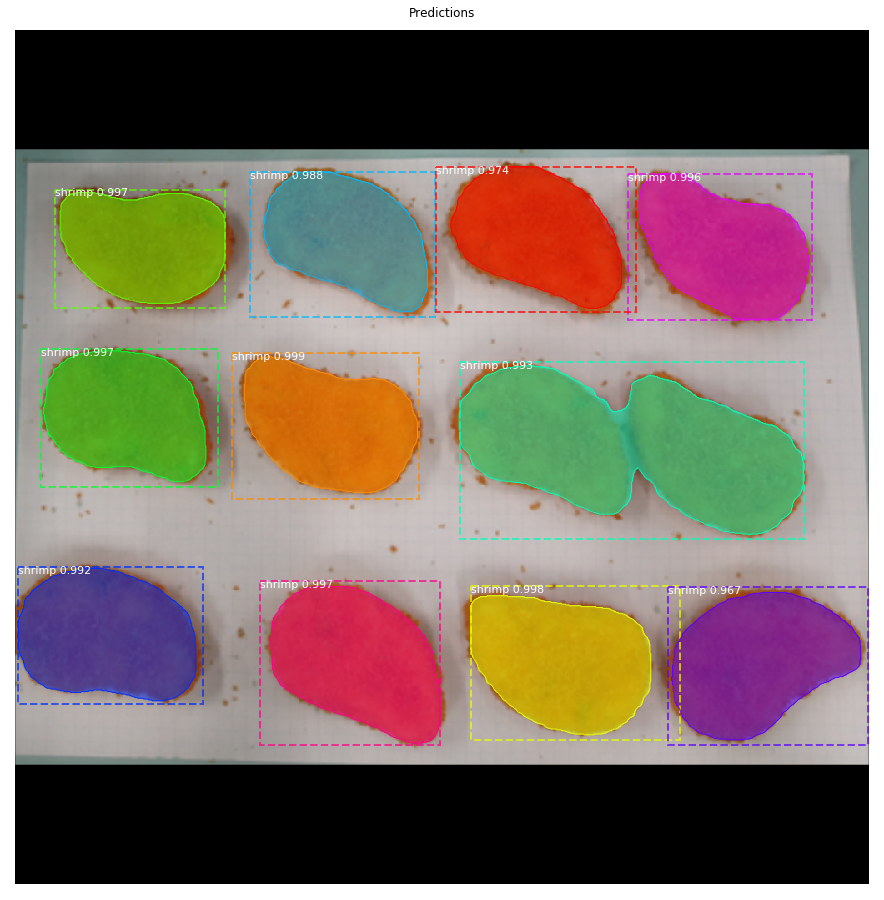

In [42]:
results = model.detect([image], verbose=1)

# Display results
# ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            dataset_val.class_names, r['scores'],
                            title='Predictions')

In [39]:
# テスト画像の読み込み
import skimage
image = skimage.io.imread('./dataset/valid/image/IMG_0499.JPG')
image.shape

(4032, 3024, 3)

In [0]:
from google.colab import files

# モデルのダウンロード
files.download('./Mask_RCNN/logs/model/cell_dataset20191128T0135/mask_rcnn_cell_dataset_0010.h5')

MessageError: ignored

In [0]:
!ls logs/model/cell_dataset20191128T0135

events.out.tfevents.1574904927.b962c17680d5  mask_rcnn_cell_dataset_0006.h5
mask_rcnn_cell_dataset_0001.h5		     mask_rcnn_cell_dataset_0007.h5
mask_rcnn_cell_dataset_0002.h5		     mask_rcnn_cell_dataset_0008.h5
mask_rcnn_cell_dataset_0003.h5		     mask_rcnn_cell_dataset_0009.h5
mask_rcnn_cell_dataset_0004.h5		     mask_rcnn_cell_dataset_0010.h5
mask_rcnn_cell_dataset_0005.h5


In [0]:
!pwd

/content
